In [4]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score, cross_val_predict, LeaveOneOut, KFold
from sklearn.svm import SVC
from hypopt import GridSearch

from sklearn.preprocessing import OneHotEncoder

from umap import UMAP
import skdim
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

In [5]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/STs-SGSM_left/13-57-40_59"
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"

In [6]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.185868,-5.771841,-30.507610,5.606935,-42.585770,-10.557935,-55.459835,-9.058824,-1.510824,-20.176199,...,63.402214,7.537055,10.882882,-46.586758,-68.655390,-19.988195,38.416927,-91.212135,0.566699,17.191797
sub-1000458,-7.471693,19.638063,-21.538250,2.226732,33.091873,-20.846067,34.400425,-21.089120,74.931366,-18.975943,...,-7.037656,31.910760,-36.148930,12.757924,-67.770454,-1.274911,-14.197478,7.364189,-17.087570,-35.701786
sub-1000575,38.932930,32.344160,4.402786,38.918230,-29.677853,-28.459377,-28.141346,3.365387,-10.871907,-4.811211,...,44.613693,30.787392,-6.355664,17.860197,-60.379490,-0.541779,14.632789,-14.847200,11.621433,23.035025
sub-1000606,-16.773706,-9.925129,19.955760,98.400540,46.628925,3.211202,26.367805,-12.522888,-27.144012,-27.185587,...,71.512020,27.759762,-51.585010,18.421910,-76.338470,-56.197617,-0.121275,-70.272194,-40.977352,11.146857
sub-1000963,-35.379436,42.459568,31.299074,28.582540,10.143468,-8.933093,-17.111063,-27.134619,-22.592220,-16.000391,...,6.450301,9.923389,-48.777775,-26.628622,-40.142610,-40.362220,39.475050,-33.237590,20.889872,-8.515278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,0.063008,-8.937850,22.627310,18.903656,11.491003,-23.642395,65.003160,-61.768364,30.422947,-63.957110,...,-40.263510,45.559326,-4.269194,14.793548,-46.278490,-8.482589,-8.091459,-20.641650,15.911405,-0.330036
sub-6023808,32.198143,10.538342,11.426944,-1.569624,41.850334,-21.967106,31.761364,-48.997280,16.628088,24.413948,...,-72.307360,-15.866320,3.907229,-36.058796,-43.702854,-31.241480,-56.196125,-13.396384,11.197630,16.732788
sub-6023847,17.887506,10.477887,-7.881521,17.285988,51.349990,30.487513,3.465086,-47.053100,-43.502520,11.385506,...,-42.554592,-43.399270,-14.604079,-1.728864,-47.572975,-10.895531,-81.464630,-24.240149,-23.508545,-11.117872


# UKBioBank

In [7]:
# norm = ukb_emb.apply(np.linalg.norm, axis=1)
# ukb_emb = ukb_emb.div(norm, axis=0)

In [8]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.185868,-5.771841,-30.507610,5.606935,-42.585770,-10.557935,-55.459835,-9.058824,-1.510824,-20.176199,...,63.402214,7.537055,10.882882,-46.586758,-68.655390,-19.988195,38.416927,-91.212135,0.566699,17.191797
sub-1000458,-7.471693,19.638063,-21.538250,2.226732,33.091873,-20.846067,34.400425,-21.089120,74.931366,-18.975943,...,-7.037656,31.910760,-36.148930,12.757924,-67.770454,-1.274911,-14.197478,7.364189,-17.087570,-35.701786
sub-1000575,38.932930,32.344160,4.402786,38.918230,-29.677853,-28.459377,-28.141346,3.365387,-10.871907,-4.811211,...,44.613693,30.787392,-6.355664,17.860197,-60.379490,-0.541779,14.632789,-14.847200,11.621433,23.035025
sub-1000606,-16.773706,-9.925129,19.955760,98.400540,46.628925,3.211202,26.367805,-12.522888,-27.144012,-27.185587,...,71.512020,27.759762,-51.585010,18.421910,-76.338470,-56.197617,-0.121275,-70.272194,-40.977352,11.146857
sub-1000963,-35.379436,42.459568,31.299074,28.582540,10.143468,-8.933093,-17.111063,-27.134619,-22.592220,-16.000391,...,6.450301,9.923389,-48.777775,-26.628622,-40.142610,-40.362220,39.475050,-33.237590,20.889872,-8.515278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,0.063008,-8.937850,22.627310,18.903656,11.491003,-23.642395,65.003160,-61.768364,30.422947,-63.957110,...,-40.263510,45.559326,-4.269194,14.793548,-46.278490,-8.482589,-8.091459,-20.641650,15.911405,-0.330036
sub-6023808,32.198143,10.538342,11.426944,-1.569624,41.850334,-21.967106,31.761364,-48.997280,16.628088,24.413948,...,-72.307360,-15.866320,3.907229,-36.058796,-43.702854,-31.241480,-56.196125,-13.396384,11.197630,16.732788
sub-6023847,17.887506,10.477887,-7.881521,17.285988,51.349990,30.487513,3.465086,-47.053100,-43.502520,11.385506,...,-42.554592,-43.399270,-14.604079,-1.728864,-47.572975,-10.895531,-81.464630,-24.240149,-23.508545,-11.117872


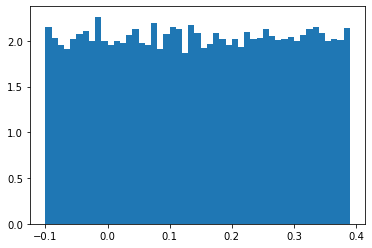

In [9]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

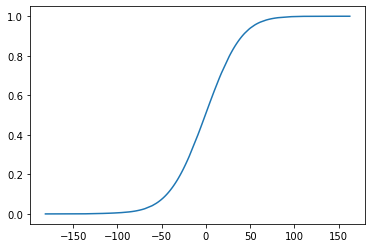

In [10]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [11]:
X2[int(N*0.59)]

6.654205

In [12]:
len(ukb_emb)

21051

In [13]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [14]:
ukb_positive

dim180    0.999952
dim218    0.999952
dim17     0.999287
dim240    0.996865
dim165    0.956724
            ...   
dim21     0.001615
dim26     0.000048
dim251    0.000048
dim82     0.000000
dim133    0.000000
Length: 256, dtype: float64

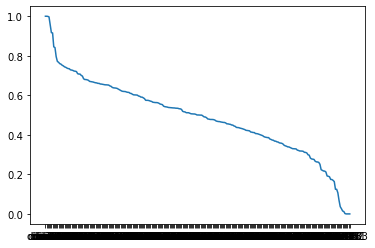

In [15]:
plt.plot(ukb_positive)

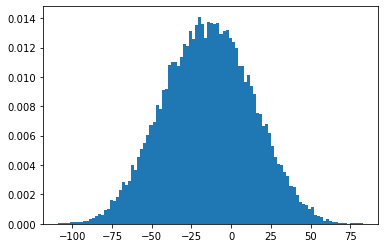

In [16]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

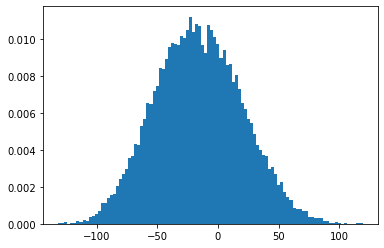

In [17]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

# UMAP

In [18]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [19]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

In [20]:
umap_ukb = visual_ukb_emb

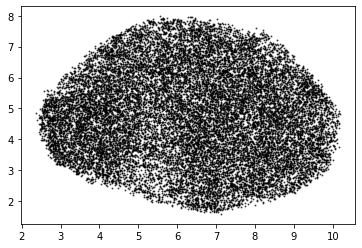

In [21]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

# UKB latent space analysis

In [22]:
global_id = skdim.id.MOM().fit(ukb_emb, n_neighbors=1000)

In [23]:
global_id.dimension_

16.813179378755983

In [24]:
# lid_mom = skdim.id.lPCA().fit_pw(ukb_emb, n_neighbors=50, n_jobs=1)

In [25]:
# lid_mom.dimension_

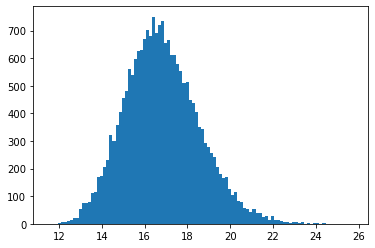

In [26]:

h = plt.hist(global_id.dimension_pw_, bins=100)

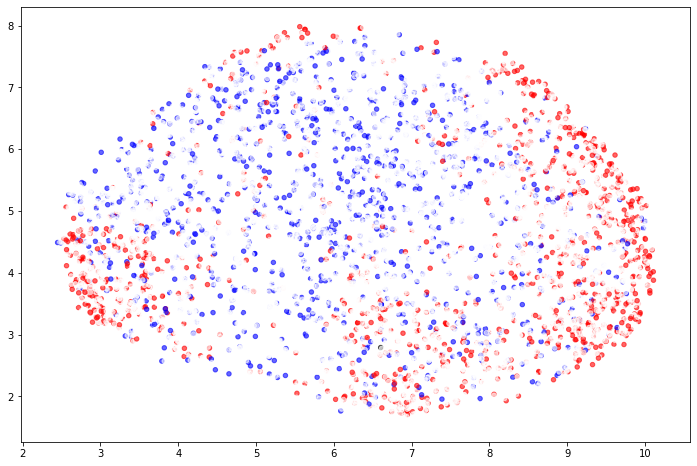

In [27]:
plt.figure(figsize=(12,8))
q_min = np.min(global_id.dimension_pw_)
q_05 = np.quantile(global_id.dimension_pw_, 0.05) 
q_95 = np.quantile(global_id.dimension_pw_, 0.95)
q_max = np.max(global_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=global_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

In [28]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(ukb_emb)

In [29]:
distances, indices = nbrs.kneighbors(ukb_emb)

In [30]:
distances.shape

(21051, 2)

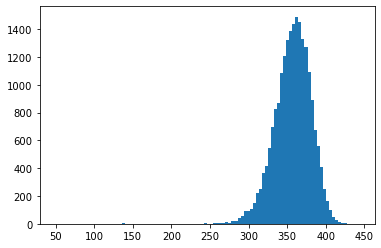

In [31]:
h = plt.hist(distances[:,1], bins=100)

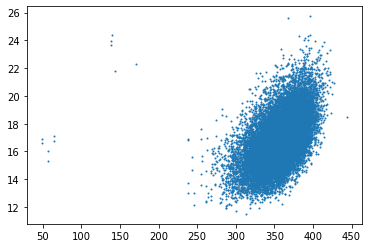

In [32]:
plt.scatter(distances[:,1], global_id.dimension_pw_, s=1)

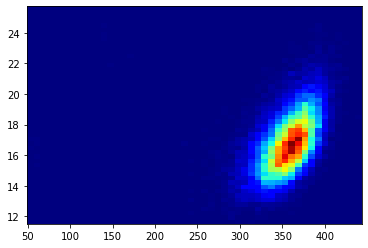

In [33]:
heatmap, xedges, yedges = np.histogram2d(distances[:,1], global_id.dimension_pw_, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()